<a href="https://colab.research.google.com/github/AmJustCJ/FinalYearProjectWork/blob/main/FYP_wind2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [1]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 21.0 MB/s eta 0:00:00


In [ ]:
!pip install matplotlib

In [ ]:
!pip install scikit-learn

In [2]:
import tensorflow as tf
import rasterio as rio
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, UpSampling2D, concatenate, Input, Conv2DTranspose, Dropout
from matplotlib import pyplot as plt
from keras.metrics import Precision, Recall, BinaryAccuracy
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

In [3]:
def normalizing(data):
    min_val = np.min(data)
    max_val = np.max(data)
    data_normalized = (data - min_val) / (max_val - min_val)
    return data_normalized

In [4]:
def get_patch(array, size=256):
    patch_list = []
    height, width, _ = array.shape
    for i in range(0, height, size):
        for j in range(0, width, size):
            patch = array[i:i+size, j:j+size, :]
            if patch.shape[0] == size and patch.shape[1] == size:
                patch_list.append(patch)
    return patch_list

In [5]:
def get_patch2(array, size=256):
    patch_list = []
    height, width = array.shape
    for i in range(0, height, size):
        for j in range(0, width, size):
            patch = array[i:i+size, j:j+size] #The diff with above func is that this make it 2D array
            if patch.shape[0] == size and patch.shape[1] == size:
                patch_list.append(patch)
    return patch_list

In [6]:
elec_demand = rio.open('/content/drive/MyDrive/FYP_data/2SquareElec.tif')
elec_demand_data = elec_demand.read(1)
print("Elec:", np.unique(elec_demand_data))
elec_demand_norm = normalizing(elec_demand_data)
print("Elec norm:", np.unique(elec_demand_norm))
print(elec_demand_norm.shape)

#plt.imshow(elec_demand_norm, cmap='gray')

Elec: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Elec norm: [0.         0.11111111 0.22222222 0.33333334 0.44444445 0.5555556
 0.6666667  0.7777778  0.8888889  1.        ]
(4096, 4096)


In [7]:
Interest_spot = rio.open('/content/drive/MyDrive/FYP_data/2SquareInterest.tif')
Interest_spot_data = Interest_spot.read(1)
print("Interest:", np.unique(Interest_spot_data))
Interest_spot_norm = normalizing(Interest_spot_data)
print("Interest norm:", np.unique(Interest_spot_norm))

#plt.imshow(Interest_spot_norm, cmap='gray')

Interest: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Interest norm: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [8]:
Land_price = rio.open('/content/drive/MyDrive/FYP_data/2SquareLandPrice.tif')
Land_price_data = Land_price.read(1)
print("land price:", np.unique(Land_price_data))
Land_price_norm = normalizing(Land_price_data)
print("Land price norm:", np.unique(Land_price_norm))

#plt.imshow(Land_price_norm, cmap='gray')

land price: [    0.      2733.8916  2756.6924 ... 70750.164  78718.46   79598.59  ]
Land price norm: [0.         0.03434598 0.03463243 ... 0.88883686 0.98894286 1.        ]


In [9]:
Natural_environment = rio.open('/content/drive/MyDrive/FYP_data/2SquareNat.tif')
Natural_environment_data = Natural_environment.read(1)
print("nat:", np.unique(Natural_environment_data))
Natural_environment_norm = normalizing(Natural_environment_data)
print("Nat norm:", np.unique(Natural_environment_norm))

#plt.imshow(Natural_environment_norm, cmap='gray')

nat: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Nat norm: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [10]:
Roads = rio.open('/content/drive/MyDrive/FYP_data/2SquareRoad.tif')
Roads_data = Roads.read(1)
print("road:", np.unique(Roads_data))
Roads_norm = normalizing(Roads_data)
print("road norm:", np.unique(Roads_norm))

#plt.imshow(Roads_norm, cmap='gray')

road: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
road norm: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [11]:
Elevation = rio.open('/content/drive/MyDrive/FYP_data/2SquareSlopeElevation.tif')
Elevation_data = Elevation.read(1)
print("eleva:", np.unique(Elevation_data))
Elevation_norm = normalizing(Elevation_data)
print("elev norm:", np.unique(Elevation_norm))

#plt.imshow(Elevation_norm, cmap='gray')

eleva: [   0.   19.   20. ... 1963. 1965. 1967.]
elev norm: [0.         0.00965938 0.01016777 ... 0.99796645 0.99898322 1.        ]


In [12]:
Transmission_line = rio.open('/content/drive/MyDrive/FYP_data/2SquareTrans.tif')
Transmission_line_data = Transmission_line.read(1)
print("transmi:",np.unique(Transmission_line_data))
Transmission_line_norm = normalizing(Transmission_line_data)
print("trans norm:", np.unique(Transmission_line_norm))

#plt.imshow(Transmission_line_norm, cmap='gray')

transmi: [ 0.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
trans norm: [0.  0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [13]:
Urban_area = rio.open('/content/drive/MyDrive/FYP_data/2SquareUrban.tif')
Urban_area_data = Urban_area.read(1)
print("urban:", np.unique(Urban_area_data))
Urban_area_norm = normalizing(Urban_area_data)
print("urban norm:", np.unique(Urban_area_norm))

#plt.imshow(Urban_area_norm, cmap='gray')

urban: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
urban norm: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [14]:
Wind_speed = rio.open('/content/drive/MyDrive/FYP_data/2SquareWindAtlas.tif')
Wind_speed_data = Wind_speed.read(1)
print("wind:", np.unique(Wind_speed_data))
Wind_speed_norm = normalizing(Wind_speed_data)
print("wind norm:", np.unique(Wind_speed_norm))

#plt.imshow(Wind_speed_norm, cmap='gray')

wind: [ 1.3139184  1.6835304  1.7052925 ... 14.390219  14.512985  14.68818  ]
wind norm: [0.         0.02763608 0.02926323 ... 0.9777213  0.9869006  1.        ]


In [15]:
#Prepare to stack all 9 criteria map together as 1 input
# input_data = np.stack((elec_demand_norm, Interest_spot_norm, Land_price_norm,
#                         Natural_environment_norm, Roads_norm, Elevation_norm,
#                         Transmission_line_norm, Urban_area_norm, Wind_speed_norm), axis=-1)

# print("Shape of input data:", input_data.shape)

input_data = Wind_speed_norm

In [16]:
#Prepare output data, the result
result_im = rio.open('/content/drive/MyDrive/FYP_data/2SquareResult.tif')
result_data = result_im.read(1)
print("result:", np.unique(result_data))
print("Shape of result data:", result_data.shape)

#plt.imshow(result_data, cmap='gray')


result: [0. 1.]
Shape of result data: (4096, 4096)


In [17]:
#Split input data(4096x4096x9 into a 256x256x9 array, and store in input_patches, should have 256 array in the list)
input_patches = get_patch2(input_data)
#same goes for result
result_patches = get_patch2(result_data)

In [18]:
#Turn the lists into a numpy array
input_patches_array = np.array(input_patches)
result_patches_array = np.array(result_patches)
result_patches_array_expand = np.expand_dims(result_patches_array, axis=-1)
input_patches_array_expand = np.expand_dims(input_patches_array, axis=-1)

62582
result_patches_array_expand[112].size:  65536
unsuitable area percentage:  95.49 %
False
length:  256
shape of result_patches_array_expand:  (256, 256, 256, 1)


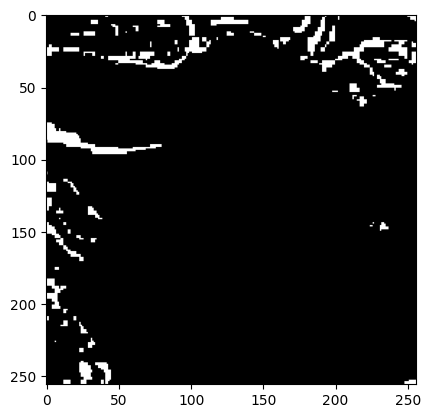

In [ ]:
#print(np.unique(result_patches_array_expand[20]))
plt.imshow(result_patches_array_expand[112, :, :, 0], cmap='gray')
num_ones = np.count_nonzero(result_patches_array_expand[112])
num_zeros = result_patches_array_expand[112].size - num_ones
print(num_zeros)
print("result_patches_array_expand[112].size: ", result_patches_array_expand[112].size)
black_pixel_perc = round(num_zeros / (num_ones + num_zeros) * 100, 2)
print("unsuitable area percentage: ", black_pixel_perc, "%")
print(black_pixel_perc >= 100.0)
print("length: ", result_patches_array_expand.shape[0])
print("shape of result_patches_array_expand: ", result_patches_array_expand.shape)

In [ ]:
def perc_black(array):
  black_pixel_perc_arr = []
  for i in range(array.shape[0]):
    num_ones = np.count_nonzero(array[i])
    num_zeros = array[i].size - num_ones
    black_pixel_perc = round(num_zeros / (num_ones + num_zeros) * 100, 2)
    print("unsuitable area percentage of array[", i, "]: ", black_pixel_perc, "%")
    black_pixel_perc_arr.append(black_pixel_perc)
  return np.array(black_pixel_perc_arr)

In [ ]:
black_pixel_perc_arr = perc_black(result_patches_array_expand)

unsuitable area percentage of array[ 0 ]:  100.0 %
unsuitable area percentage of array[ 1 ]:  100.0 %
unsuitable area percentage of array[ 2 ]:  100.0 %
unsuitable area percentage of array[ 3 ]:  95.58 %
unsuitable area percentage of array[ 4 ]:  100.0 %
unsuitable area percentage of array[ 5 ]:  100.0 %
unsuitable area percentage of array[ 6 ]:  100.0 %
unsuitable area percentage of array[ 7 ]:  100.0 %
unsuitable area percentage of array[ 8 ]:  99.42 %
unsuitable area percentage of array[ 9 ]:  100.0 %
unsuitable area percentage of array[ 10 ]:  49.56 %
unsuitable area percentage of array[ 11 ]:  31.24 %
unsuitable area percentage of array[ 12 ]:  29.24 %
unsuitable area percentage of array[ 13 ]:  34.94 %
unsuitable area percentage of array[ 14 ]:  84.42 %
unsuitable area percentage of array[ 15 ]:  98.92 %
unsuitable area percentage of array[ 16 ]:  100.0 %
unsuitable area percentage of array[ 17 ]:  99.81 %
unsuitable area percentage of array[ 18 ]:  100.0 %
unsuitable area percen

In [ ]:
def fully_black_perc(array):
  count = 0
  fifty_count = 0
  fifty_count2 = 0
  categories = []
  for i in range(array.size):
    if array[i] >= 95:
      count = count + 1
      categories.append(1)
    elif array[i] >= 51:
      fifty_count = fifty_count + 1
      categories.append(2)
    else:
      fifty_count2 = fifty_count2 + 1
      categories.append(3)
  return count, fifty_count, fifty_count2, np.array(categories)

In [ ]:
print(black_pixel_perc_arr.size)
count, fifty_count, fifty_count2, categories = fully_black_perc(black_pixel_perc_arr)
print("Number of images where 95 to 100% is black pixel: ", count)
print("Number of images where 51-94% of it is unsuitable for wind farm: ", fifty_count)
print("Number of images where 0-50% of it is unsuitable for wind farm: ", fifty_count2)

256
Number of images where 95 to 100% is black pixel:  134
Number of images where 51-94% of it is unsuitable for wind farm:  76
Number of images where 0-50% of it is unsuitable for wind farm:  46


In [19]:
def remove_category1(input_array, mask_array):
  category1_indices = []

  for i in range(mask_array.shape[0]):
    num_ones = np.count_nonzero(mask_array[i])
    num_zeros = mask_array[i].size - num_ones
    black_pixel_percentage = num_zeros / (num_ones + num_zeros)
    if black_pixel_percentage >= 0.95:
      category1_indices.append(i)

  #Randomly shuffle the list of category 1 indices
  np.random.shuffle(category1_indices)

  #Select first 46 indices to remove
  indices_to_remove = category1_indices[:46]

  #Reverse sort the indices to remove to prevent index shifting
  indices_to_remove.sort(reverse=True)

  for index in indices_to_remove:
    input_array = np.delete(input_array, index, 0)  #Remove input data where its corresponding ground truth image has 95% to 100% black pixel
    mask_array = np.delete(mask_array, index, 0) # Remove ground truth data who has 95% to 100% black pixel

  return input_array, mask_array

input_patches_array_expand, result_patches_array_expand = remove_category1(input_patches_array_expand, result_patches_array_expand)

In [20]:
print(input_patches_array_expand.shape)
print(result_patches_array_expand.shape)

(210, 256, 256, 1)
(210, 256, 256, 1)


In [21]:
# Duplicate all 46 images whose ground truth binary mask has <=50% of black pixel (Category 3)
# Then apply data augmentation to these new bunch, then add back to original dataset

def improve_category3(input_array, mask_array, num_augmentation):
  category3_indices = []

  for i in range(mask_array.shape[0]):
    num_ones = np.count_nonzero(mask_array[i])
    num_zeros = mask_array[i].size - num_ones
    black_pixel_percentage = num_zeros / (num_ones + num_zeros)
    if black_pixel_percentage < 0.51:
      category3_indices.append(i)

  print(category3_indices)
  #create a new array that copy all 46 category 3 images
  category3_input_array = input_array[category3_indices]
  category3_mask_array = mask_array[category3_indices]

  #Data augmentation parameters
  data_gen_args = dict(rotation_range = 90,
                       horizontal_flip = True,
                       vertical_flip = True,
                       fill_mode = 'nearest')

  #Create image data generator
  image_datagen = ImageDataGenerator(**data_gen_args)
  mask_datagen = ImageDataGenerator(**data_gen_args)

  #Prepare generators
  image_datagen.fit(category3_input_array)
  mask_datagen.fit(category3_mask_array)

  #Apply augmentation
  aug_input_images = []
  aug_mask_images = []

  for i in range(num_augmentation):
    #Augementate input image
    iter_img = image_datagen.flow(category3_input_array, batch_size = category3_input_array.shape[0], shuffle=False)
    aug_img = next(iter_img)

    #Augementate mask image
    iter_mask = mask_datagen.flow(category3_mask_array, batch_size = category3_mask_array.shape[0], shuffle=False)
    aug_mask = next(iter_mask)

    aug_input_images.extend(aug_img)
    aug_mask_images.extend(aug_mask)

  # Concatenate the augmented data back to original data
  input_array = np.concatenate((input_array, np.array(aug_input_images)), axis = 0)
  mask_array = np.concatenate((mask_array, np.array(aug_mask_images)), axis = 0)

  return input_array, mask_array

In [22]:
# Call the function to improve category 3 images
input_patches_array_expand, result_patches_array_expand = improve_category3(input_patches_array_expand, result_patches_array_expand, 1)
print(input_patches_array_expand.shape)
print(result_patches_array_expand.shape)

[8, 9, 10, 11, 21, 22, 23, 24, 36, 37, 38, 39, 49, 50, 51, 52, 53, 64, 65, 66, 75, 76, 77, 78, 79, 80, 92, 93, 94, 104, 105, 118, 119, 120, 121, 122, 133, 157, 158, 179, 180, 190, 191, 192, 204, 205]
(256, 256, 256, 1)
(256, 256, 256, 1)


28067
result_patches_array_expand[210].size:  65536
unsuitable area percentage:  42.83 %
length:  256
shape of result_patches_array_expand:  (256, 256, 256, 1)


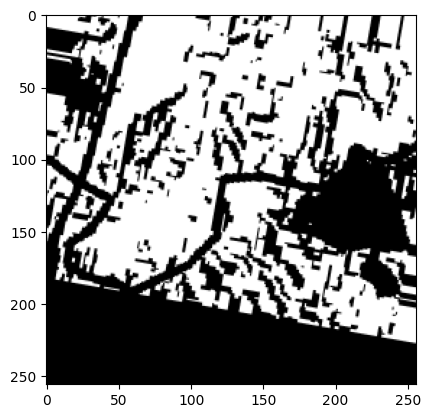

In [ ]:
plt.imshow(result_patches_array_expand[210, :, :, 0], cmap='gray')
num_ones = np.count_nonzero(result_patches_array_expand[210])
num_zeros = result_patches_array_expand[210].size - num_ones
print(num_zeros)
print("result_patches_array_expand[210].size: ", result_patches_array_expand[210].size)
black_pixel_perc = round(num_zeros / (num_ones + num_zeros) * 100, 2)
print("unsuitable area percentage: ", black_pixel_perc, "%")
print("length: ", result_patches_array_expand.shape[0])
print("shape of result_patches_array_expand: ", result_patches_array_expand.shape)

In [ ]:
black_pixel_perc_arr = perc_black(result_patches_array_expand)

unsuitable area percentage of array[ 0 ]:  100.0 %
unsuitable area percentage of array[ 1 ]:  100.0 %
unsuitable area percentage of array[ 2 ]:  95.58 %
unsuitable area percentage of array[ 3 ]:  100.0 %
unsuitable area percentage of array[ 4 ]:  100.0 %
unsuitable area percentage of array[ 5 ]:  100.0 %
unsuitable area percentage of array[ 6 ]:  100.0 %
unsuitable area percentage of array[ 7 ]:  100.0 %
unsuitable area percentage of array[ 8 ]:  49.56 %
unsuitable area percentage of array[ 9 ]:  31.24 %
unsuitable area percentage of array[ 10 ]:  29.24 %
unsuitable area percentage of array[ 11 ]:  34.94 %
unsuitable area percentage of array[ 12 ]:  84.42 %
unsuitable area percentage of array[ 13 ]:  100.0 %
unsuitable area percentage of array[ 14 ]:  99.81 %
unsuitable area percentage of array[ 15 ]:  91.6 %
unsuitable area percentage of array[ 16 ]:  100.0 %
unsuitable area percentage of array[ 17 ]:  100.0 %
unsuitable area percentage of array[ 18 ]:  100.0 %
unsuitable area percent

In [ ]:
print(black_pixel_perc_arr.size)
count, fifty_count, fifty_count2, categories = fully_black_perc(black_pixel_perc_arr)
print("Number of images where 95 to 100% is black pixel: ", count)
print("Number of images where 51-94% of it is unsuitable for wind farm: ", fifty_count)
print("Number of images where 0-50% of it is unsuitable for wind farm: ", fifty_count2)

256
Number of images where 95 to 100% is black pixel:  88
Number of images where 51-94% of it is unsuitable for wind farm:  76
Number of images where 0-50% of it is unsuitable for wind farm:  92


In [ ]:
# #Now split them to training sets
# #split 60% to training set, the rest 40% to vali+test, also split the categories in same way
# x_train, x_temp, y_train, y_temp, categories_train, categories_temp = train_test_split(
#     input_patches_array, result_patches_array_expand, categories, test_size=0.4, stratify=categories, random_state=42
# )
# #Split vali+test with 20% valiu and 20% test, also assign categories to them
# x_val, x_test, y_val, y_test = train_test_split(
#     x_temp, y_temp, test_size=0.5, stratify=categories_temp, random_state=42
# )

In [23]:
#Now split them to training sets
#training+validation get 80%, whereas testing get 20%
x_train_val, x_test, y_train_val, y_test = train_test_split(input_patches_array_expand, result_patches_array_expand, test_size=0.2, random_state=42)
#Now traning and validation got 80%, we split them into 25%, meaning:
#training 60%, vali 20%, test 20%
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=42)

[0.]


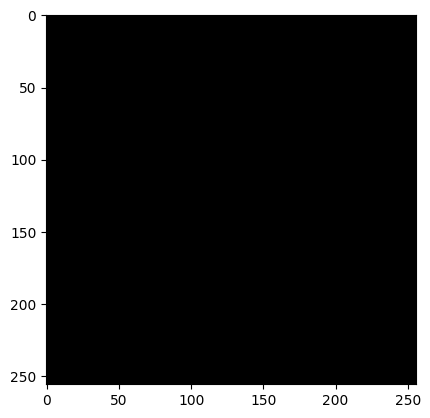

In [ ]:
print(np.unique(y_train[80]))
plt.imshow(y_train[80, :, :, 0], cmap='gray')

In [24]:
# Create performance metrics for model

precision = Precision()
recall = Recall()

def IntersectionOverUnion(y_true, y_pred, smooth=1e-6):
  Intersection = K.sum(y_true * y_pred)
  union = K.sum(y_true) + K.sum(y_pred) - Intersection
  iou = (Intersection + smooth) / (union + smooth)
  return iou

def DiceCoefficient(y_true, y_pred, smooth=1e-6):
  intersection = K.sum(y_true * y_pred)
  return (2 * intersection + smooth) / (K.sum(y_true) + K.sum(y_pred) + smooth)



In [ ]:
# # Data augmentation

# # Create image data generator for augmentation
# data_gen_args = dict(
#     rotation_range=90,
#     horizontal_flip=True,
#     vertical_flip=True,
#     fill_mode='nearest'
# )

# image_datagen = ImageDataGenerator(**data_gen_args)
# mask_datagen = ImageDataGenerator(**data_gen_args)

# # Provide the same seed and keyword arguments to the fit and flow methods
# seed = 1
# image_datagen.fit(x_train, augment=True, seed=seed)
# mask_datagen.fit(y_train, augment=True, seed=seed)

# image_generator = image_datagen.flow(x_train, batch_size=32, seed=seed)
# mask_generator = mask_datagen.flow(y_train, batch_size=32, seed=seed)

# # Combine generators into one which yields image and masks
# train_generator = zip(image_generator, mask_generator)

In [25]:
def create_Unet_cnn(input_shape=(256, 256, 1)):
    #Input layer
    inputs = Input(input_shape)

    #Downsampling
    c1 = Conv2D(16, (3,3), activation='relu', padding='same')(inputs)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3,3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2,2))(c1)

    c2 = Conv2D(32, (3,3), activation='relu', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3,3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2,2))(c2)

    c3 = Conv2D(64, (3,3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.1)(c3)
    c3 = Conv2D(64, (3,3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2,2))(c3)

    c4 = Conv2D(128, (3,3), activation='relu', padding='same')(p3)
    c4 = Dropout(0.1)(c4)
    c4 = Conv2D(128, (3,3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D((2,2))(c4)

    #Bottleneck
    c5 = Conv2D(256, (3,3), activation='relu', padding='same')(p4)
    c5 = Dropout(0.1)(c5)
    c5 = Conv2D(256, (3,3), activation='relu', padding='same')(c5)

    #Upsampling
    u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c5)
    u6 = concatenate([u6, c4]) #merge
    c6 = Conv2D(128, (3,3), activation='relu', padding='same')(u6)
    c6 = Dropout(0.1)(c6)
    c6 = Conv2D(128, (3,3), activation='relu', padding='same')(c6)

    u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(c6)
    u7 = concatenate([u7, c3]) #merge
    c7 = Conv2D(64, (3,3), activation='relu', padding='same')(u7)
    c7 = Dropout(0.1)(c7)
    c7 = Conv2D(64, (3,3), activation='relu', padding='same')(c7)

    u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c7)
    u8 = concatenate([u8, c2]) #merge
    c8 = Conv2D(32, (3,3), activation='relu', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3,3), activation='relu', padding='same')(c8)

    u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3) #merge
    c9 = Conv2D(16, (3,3), activation='relu', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3,3), activation='relu', padding='same')(c9)

    #Output
    outputs = Conv2D(1, (1,1), activation='sigmoid', padding='same')(c9)

    #Compile model
    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', precision, recall, IntersectionOverUnion, DiceCoefficient])

    return model

# Create and compile the model
model = create_Unet_cnn()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         160       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [26]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr = 0.0001)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [27]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=40, validation_data=(x_val, y_val),  callbacks=[reduce_lr, early_stop])

Epoch 1/40
5/5 [==============================] - 41s 4s/step - loss: 0.6652 - accuracy: 0.6822 - precision: 0.3693 - recall: 0.0031 - IntersectionOverUnion: 0.2197 - DiceCoefficient: 0.3595 - val_loss: 0.6213 - val_accuracy: 0.7045 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_IntersectionOverUnion: 0.1829 - val_DiceCoefficient: 0.3088 - lr: 0.0010
Epoch 2/40
5/5 [==============================] - 2s 375ms/step - loss: 0.6281 - accuracy: 0.6830 - precision: 0.0000e+00 - recall: 0.0000e+00 - IntersectionOverUnion: 0.1798 - DiceCoefficient: 0.3046 - val_loss: 0.6107 - val_accuracy: 0.7045 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_IntersectionOverUnion: 0.1615 - val_DiceCoefficient: 0.2777 - lr: 0.0010
Epoch 3/40
5/5 [==============================] - 2s 371ms/step - loss: 0.6304 - accuracy: 0.6830 - precision: 0.0000e+00 - recall: 0.0000e+00 - IntersectionOverUnion: 0.1709 - DiceCoefficient: 0.2916 - val_loss: 0.6114 - val_accuracy: 0.7045 - val_precision: 

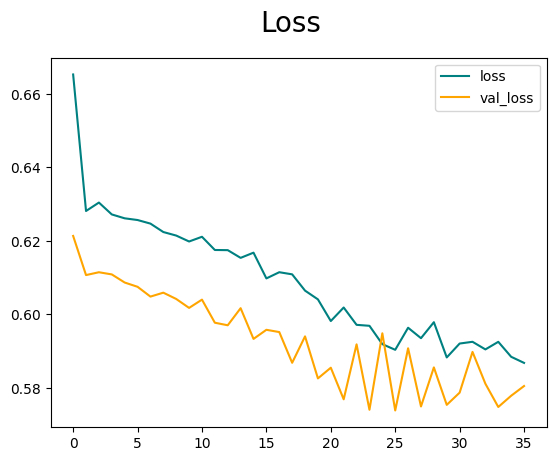

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label = 'loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

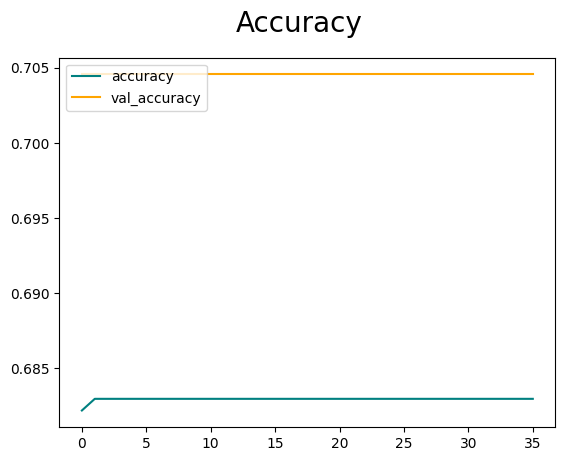

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

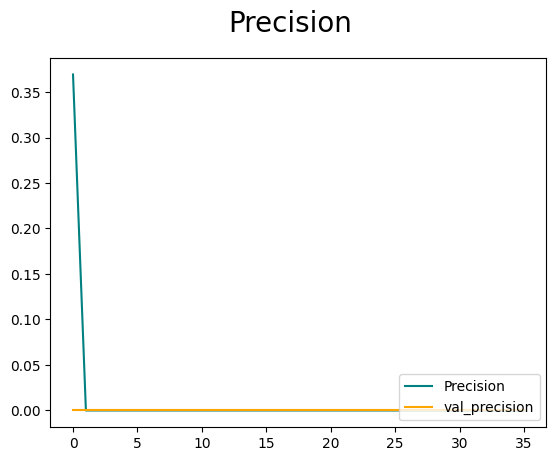

In [30]:
fig = plt.figure()
plt.plot(hist.history['precision'], color='teal', label = 'Precision')
plt.plot(hist.history['val_precision'], color='orange', label='val_precision')
fig.suptitle('Precision', fontsize=20)
plt.legend(loc='lower right')
plt.show()

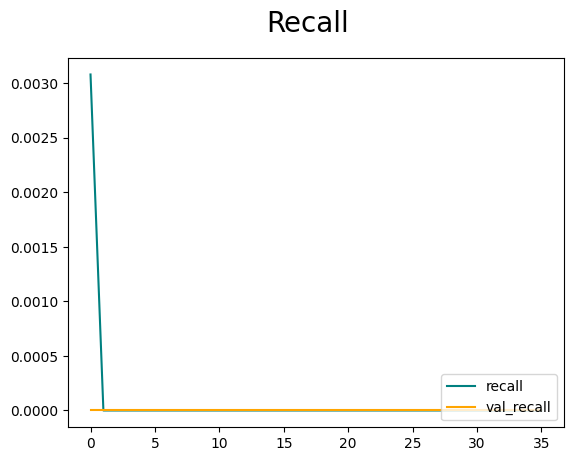

In [31]:
fig = plt.figure()
plt.plot(hist.history['recall'], color='teal', label = 'recall')
plt.plot(hist.history['val_recall'], color='orange', label='val_recall')
fig.suptitle('Recall', fontsize=20)
plt.legend(loc='lower right')
plt.show()

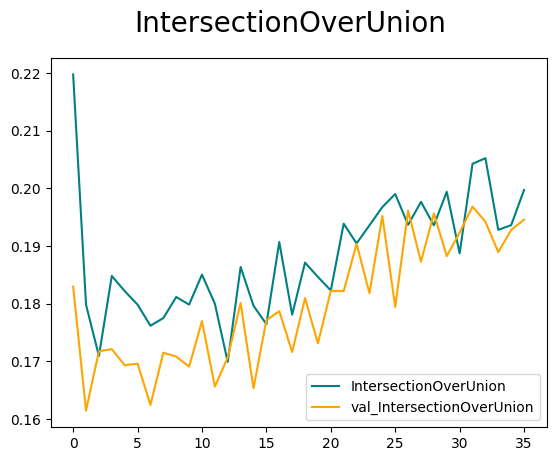

In [32]:
fig = plt.figure()
plt.plot(hist.history['IntersectionOverUnion'], color='teal', label = 'IntersectionOverUnion')
plt.plot(hist.history['val_IntersectionOverUnion'], color='orange', label='val_IntersectionOverUnion')
fig.suptitle('IntersectionOverUnion', fontsize=20)
plt.legend(loc='lower right')
plt.show()

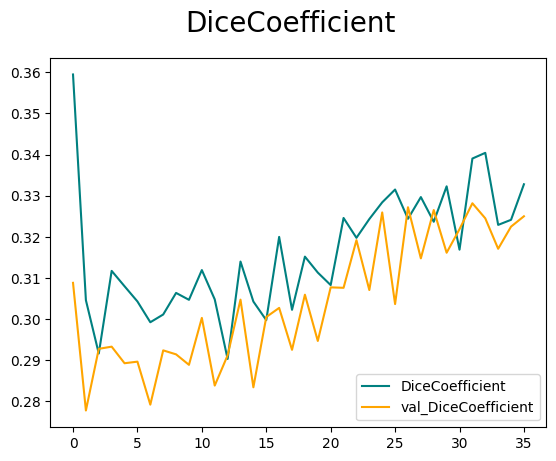

In [33]:
fig = plt.figure()
plt.plot(hist.history['DiceCoefficient'], color='teal', label = 'DiceCoefficient')
plt.plot(hist.history['val_DiceCoefficient'], color='orange', label='val_DiceCoefficient')
fig.suptitle('DiceCoefficient', fontsize=20)
plt.legend(loc='lower right')
plt.show()

In [34]:
test_loss, test_accuracy, test_precision, test_recall, test_iou, test_dice = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test Intersection Over Union: {test_iou}")
print(f"Test Dice Coefficient: {test_dice}")

2/2 [==============================] - 3s 3s/step - loss: 0.6153 - accuracy: 0.6454 - precision: 0.0000e+00 - recall: 0.0000e+00 - IntersectionOverUnion: 0.2052 - DiceCoefficient: 0.3405
Test Loss: 0.6153473258018494
Test Accuracy: 0.6453842520713806
Test Precision: 0.0
Test Recall: 0.0
Test Intersection Over Union: 0.20520909130573273
Test Dice Coefficient: 0.34051358699798584


In [35]:
predictions = model.predict(x_test)
threshold_pred = (predictions > 0.5).astype('float32')


2/2 [==============================] - 0s 90ms/step


In [36]:
print(predictions.shape)

(52, 256, 256, 1)


In [37]:
def plot_pred(y_test, predictions, num):
  for i in range(num):
    plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    plt.imshow(y_test[i, :, :], cmap='gray')
    plt.title('Ground Truth')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(predictions[i, :, :, 0], cmap='gray')
    plt.title('Model Prediction')
    plt.axis('off')

    plt.show()

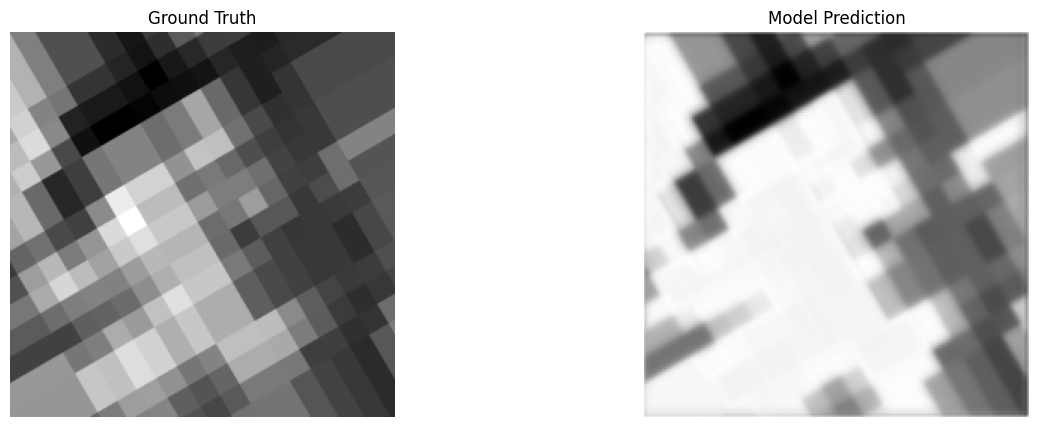

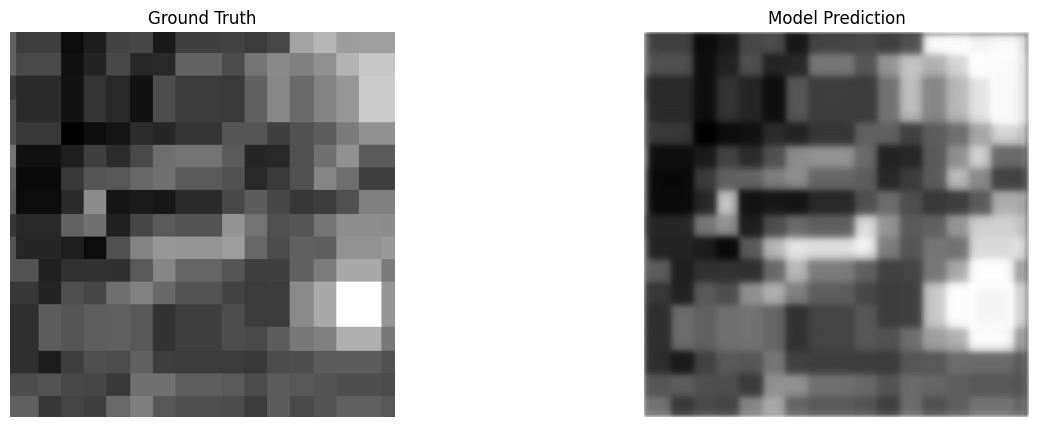

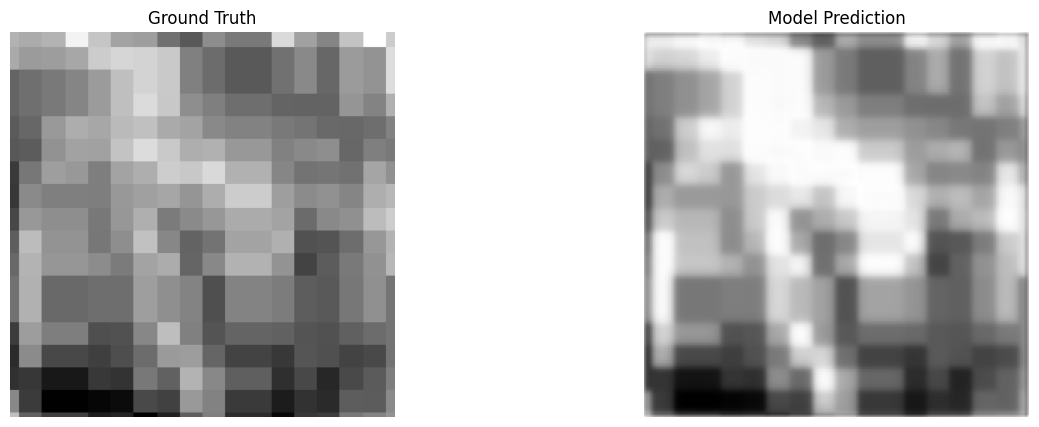

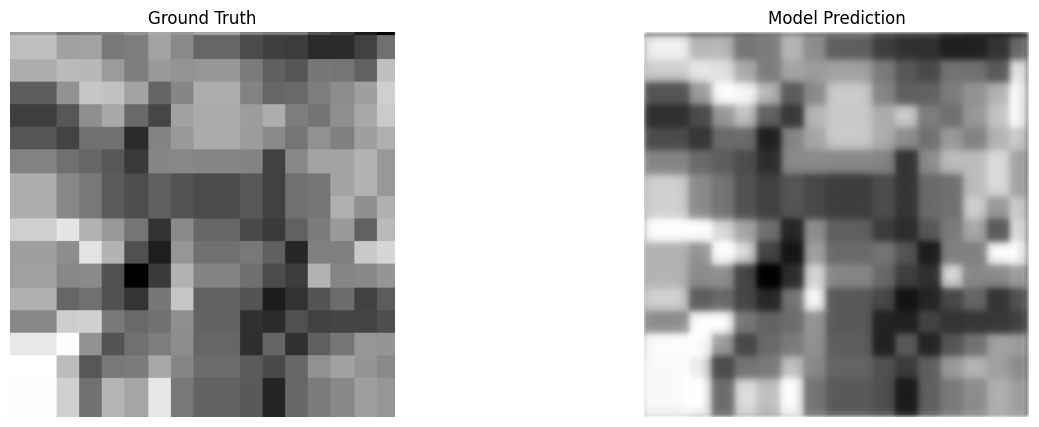

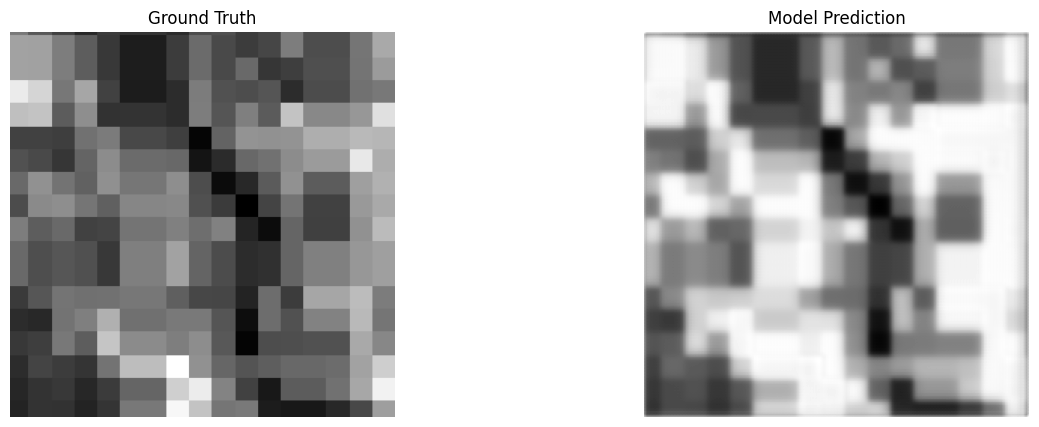

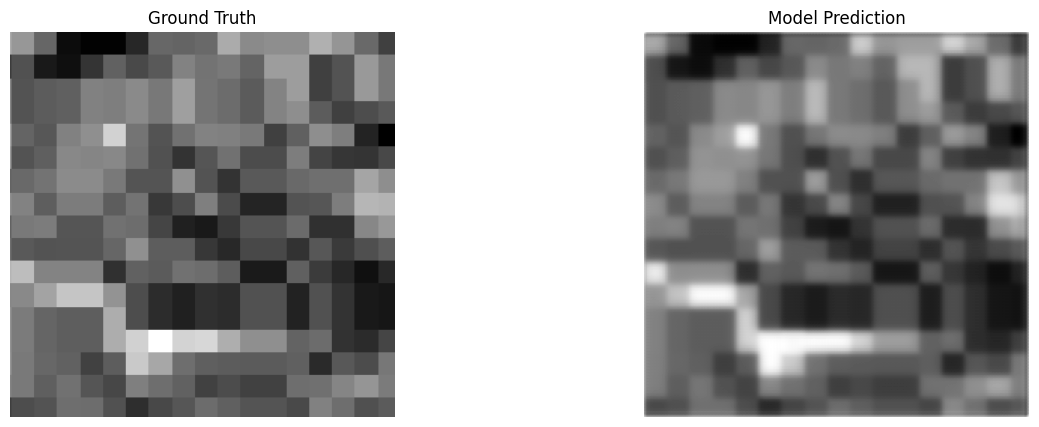

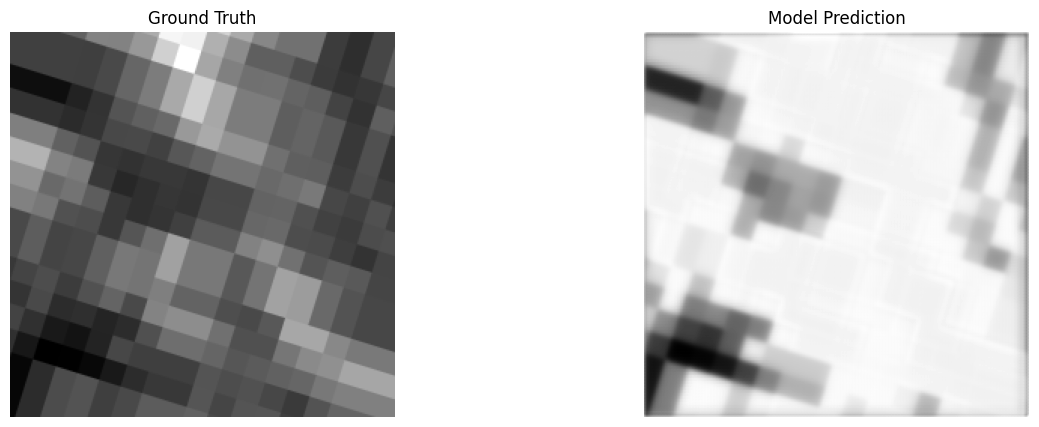

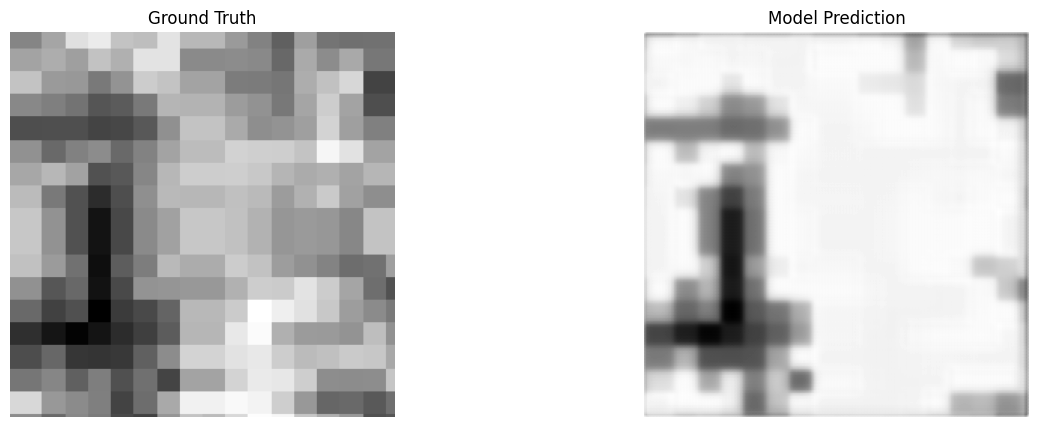

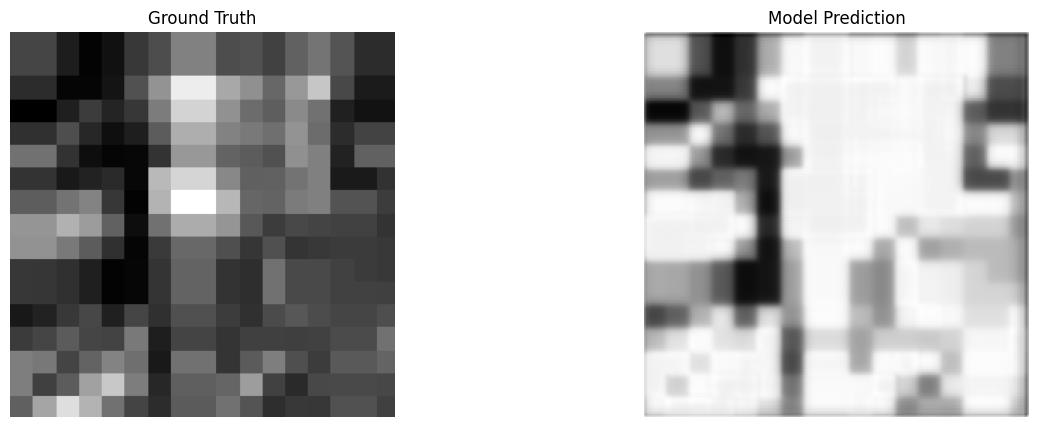

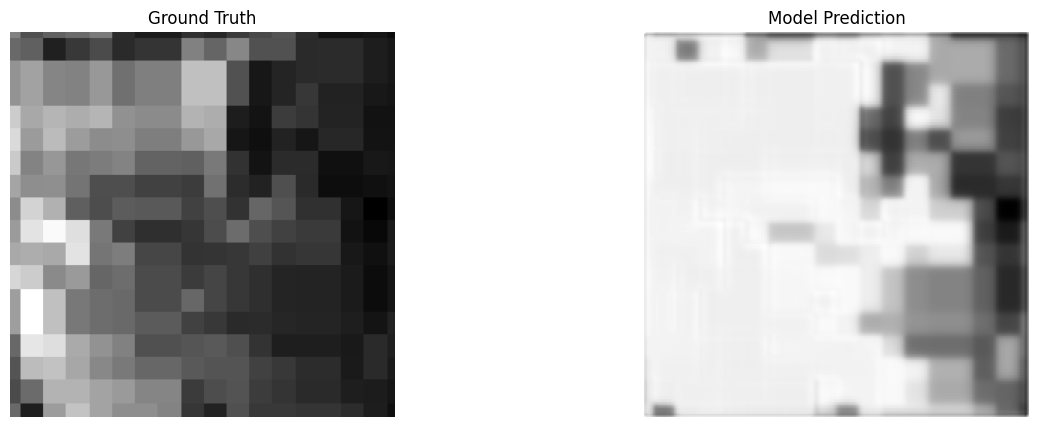

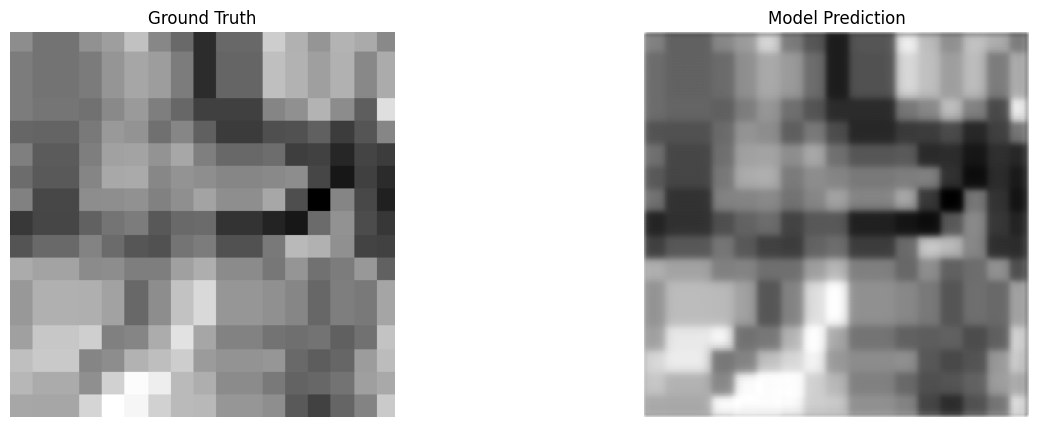

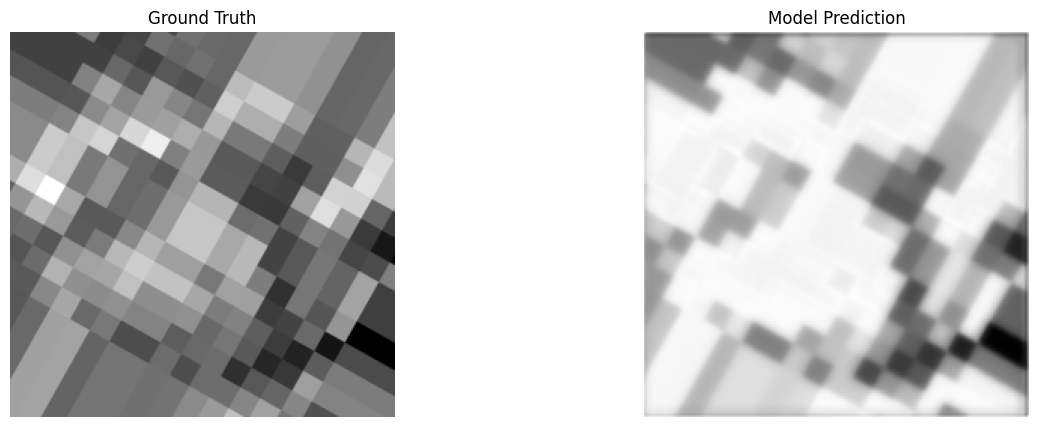

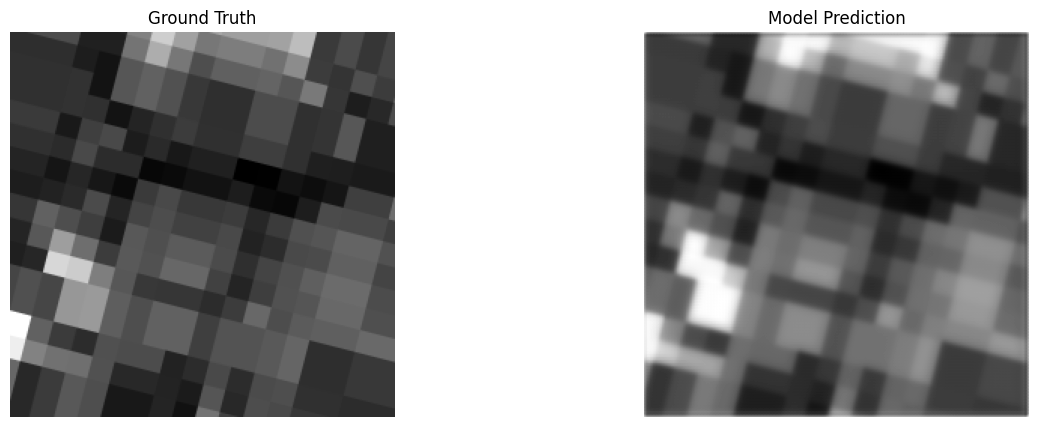

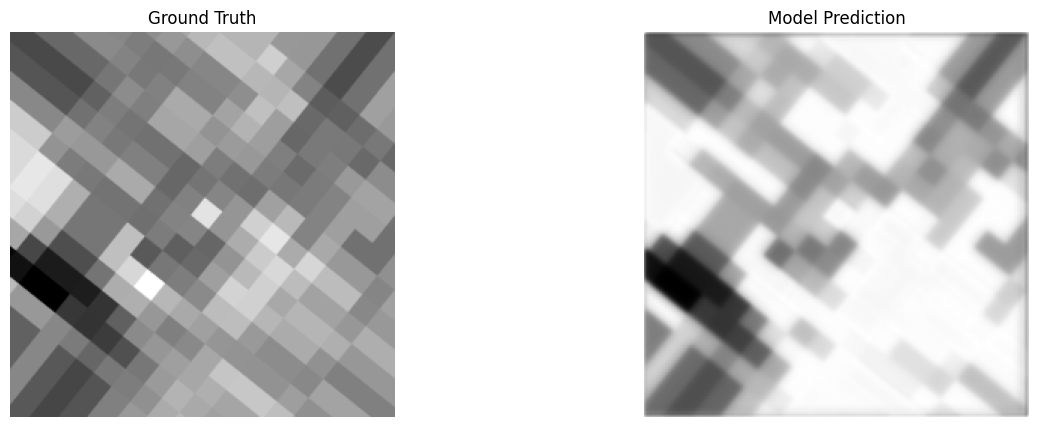

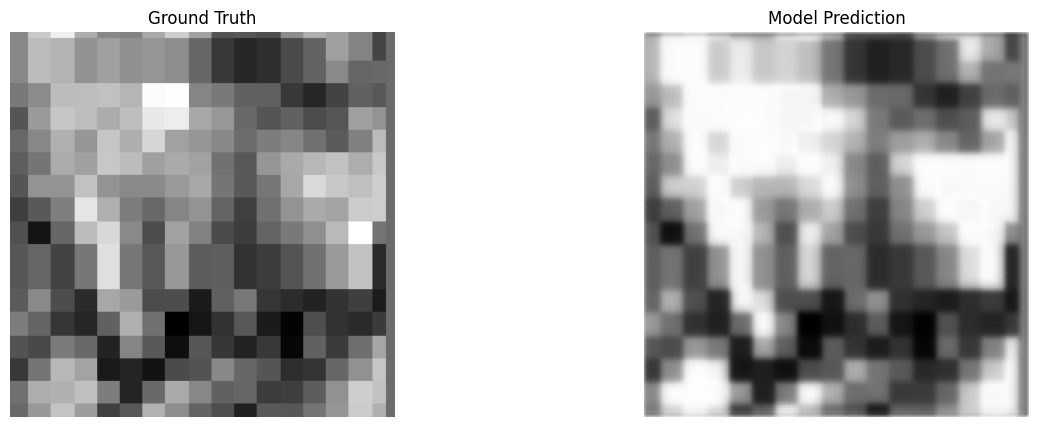

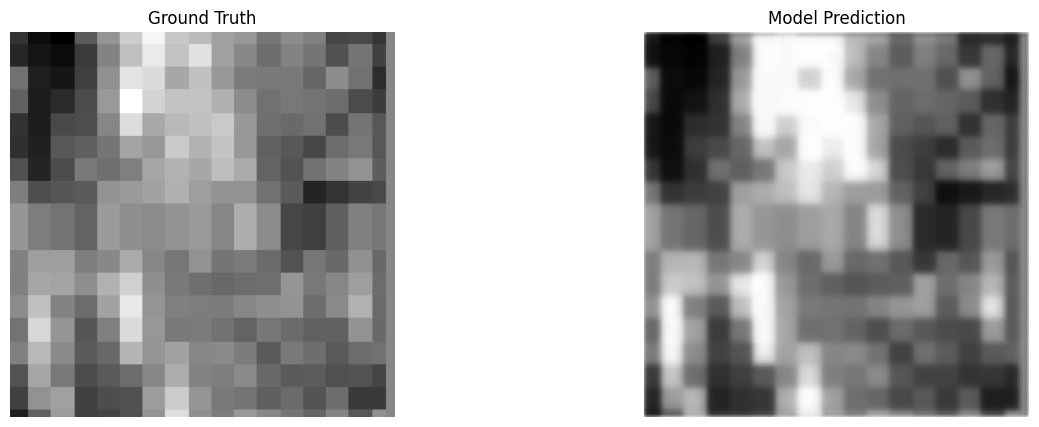

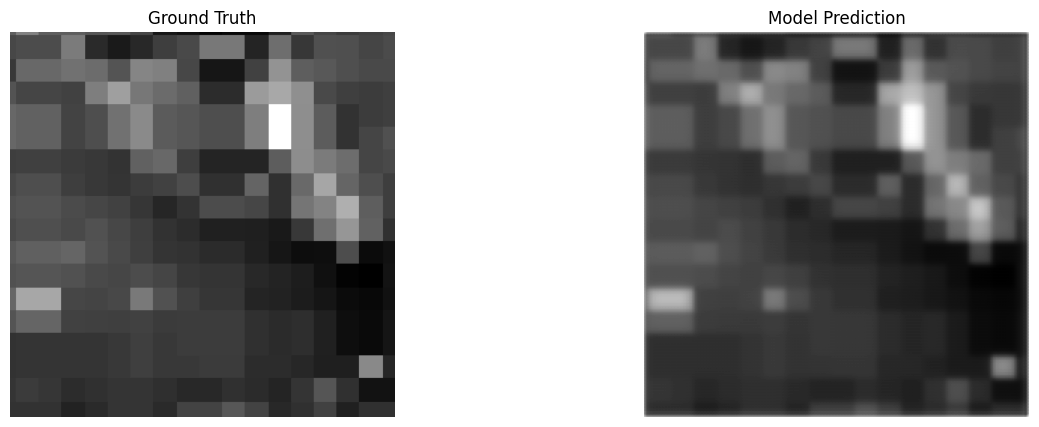

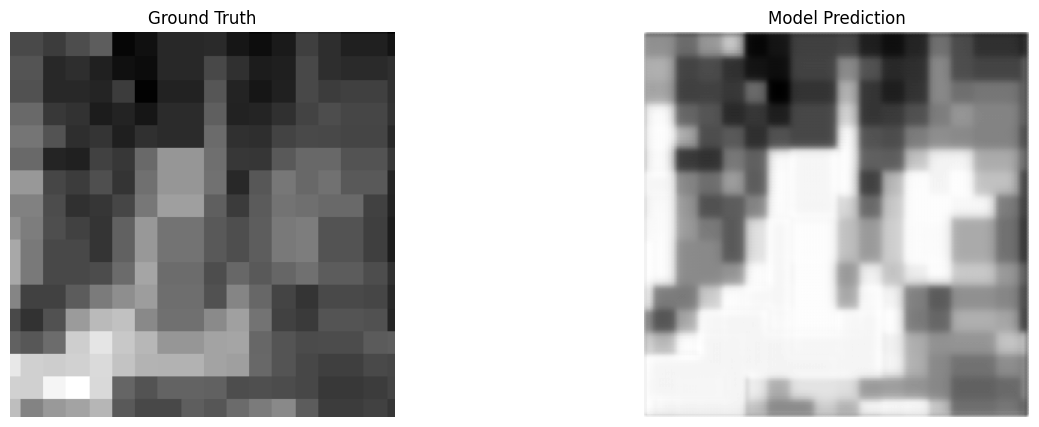

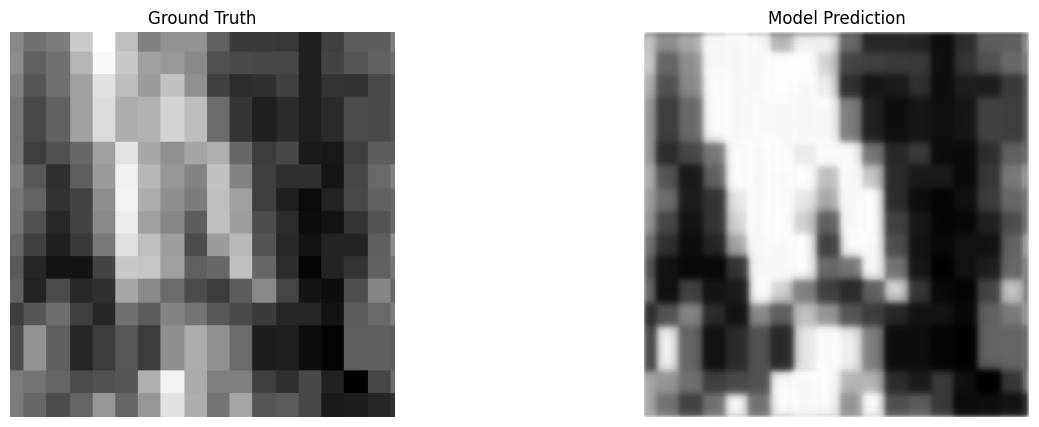

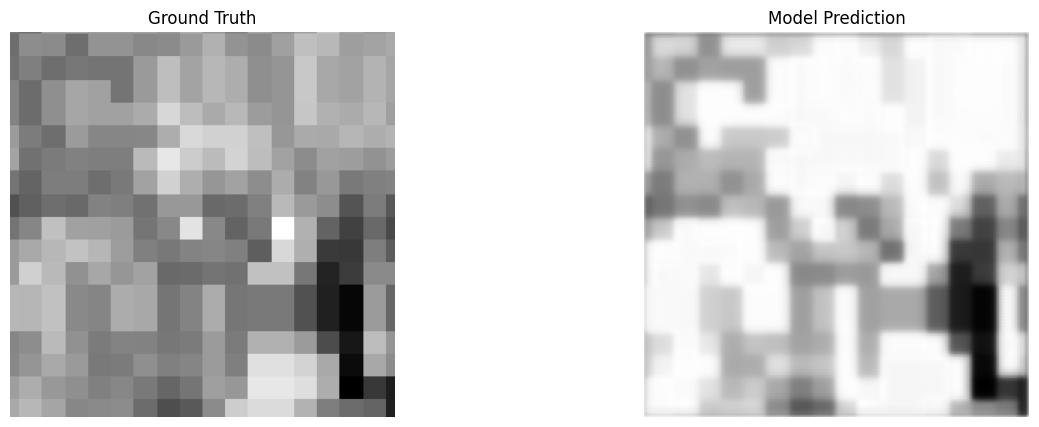

In [38]:
plot_pred(x_test, predictions, num=20)

In [39]:
def plot_single_pred(x_test, y_test, predictions, threshold_pred, index):
  plt.figure(figsize=(15,8))

  plt.subplot(1,3,1)
  plt.imshow(x_test[index, :, :, 0], cmap='gray')
  plt.title('Wind speed')
  plt.axis('off')

  plt.subplot(1,3,2)
  plt.imshow(y_test[index, :, :, 0], cmap='gray')
  plt.title('Ground truth')
  plt.axis('off')

  plt.subplot(1,3,3)
  plt.imshow(predictions[index, :, :, 0], cmap='gray')
  plt.title('Model predictions')
  plt.axis('off')

  plt.show()



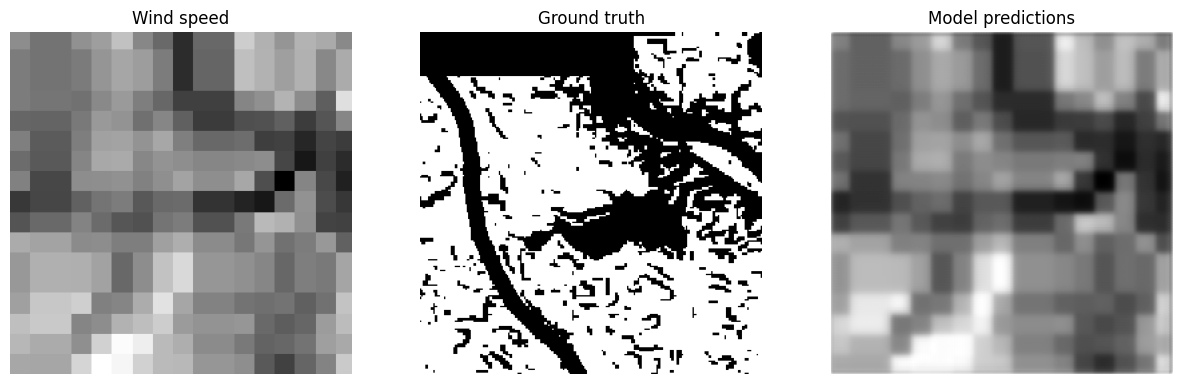

In [40]:
plot_single_pred(x_test, y_test, predictions, threshold_pred, 10)

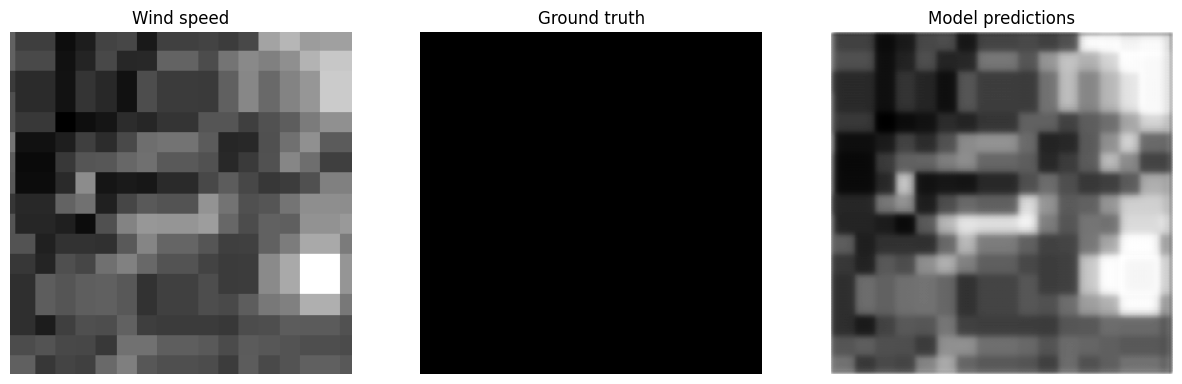

In [41]:
plot_single_pred(x_test, y_test, predictions, threshold_pred, 1)

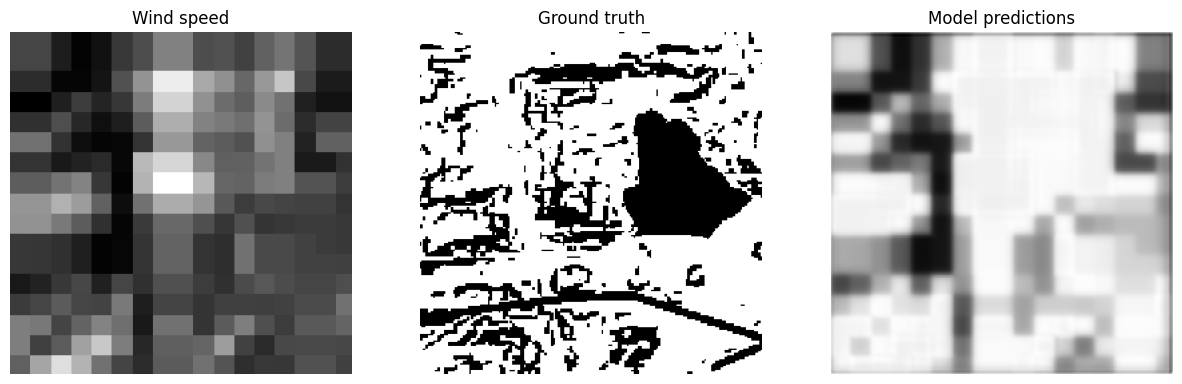

In [42]:
plot_single_pred(x_test, y_test, predictions, threshold_pred, 8)

unsuitable area percentage:  100.0 %


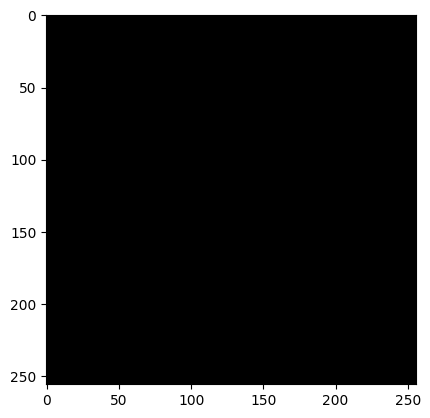

In [43]:
plt.imshow(y_test[1, :, :, 0], cmap='gray')
num_ones = np.count_nonzero(y_test[1])
num_zeros = y_test[1].size - num_ones
black_pixel_perc = round(num_zeros / (num_ones + num_zeros) * 100, 2)
print("unsuitable area percentage: ", black_pixel_perc, "%")


unsuitable area percentage:  31.24 %


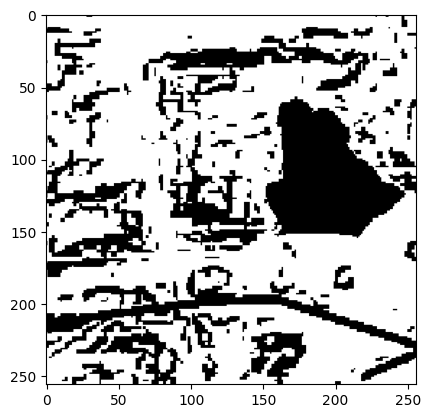

In [44]:
plt.imshow(y_test[8, :, :, 0], cmap='gray')
num_ones = np.count_nonzero(y_test[8])
num_zeros = y_test[8].size - num_ones
black_pixel_perc = round(num_zeros / (num_ones + num_zeros) * 100, 2)
print("unsuitable area percentage: ", black_pixel_perc, "%")


unsuitable area percentage:  39.26 %


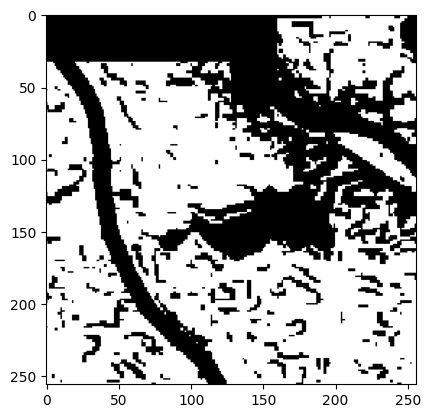

In [45]:
plt.imshow(y_test[10, :, :, 0], cmap='gray')
num_ones = np.count_nonzero(y_test[10])
num_zeros = y_test[10].size - num_ones
black_pixel_perc = round(num_zeros / (num_ones + num_zeros) * 100, 2)
print("unsuitable area percentage: ", black_pixel_perc, "%")


(-0.5, 255.5, 255.5, -0.5)

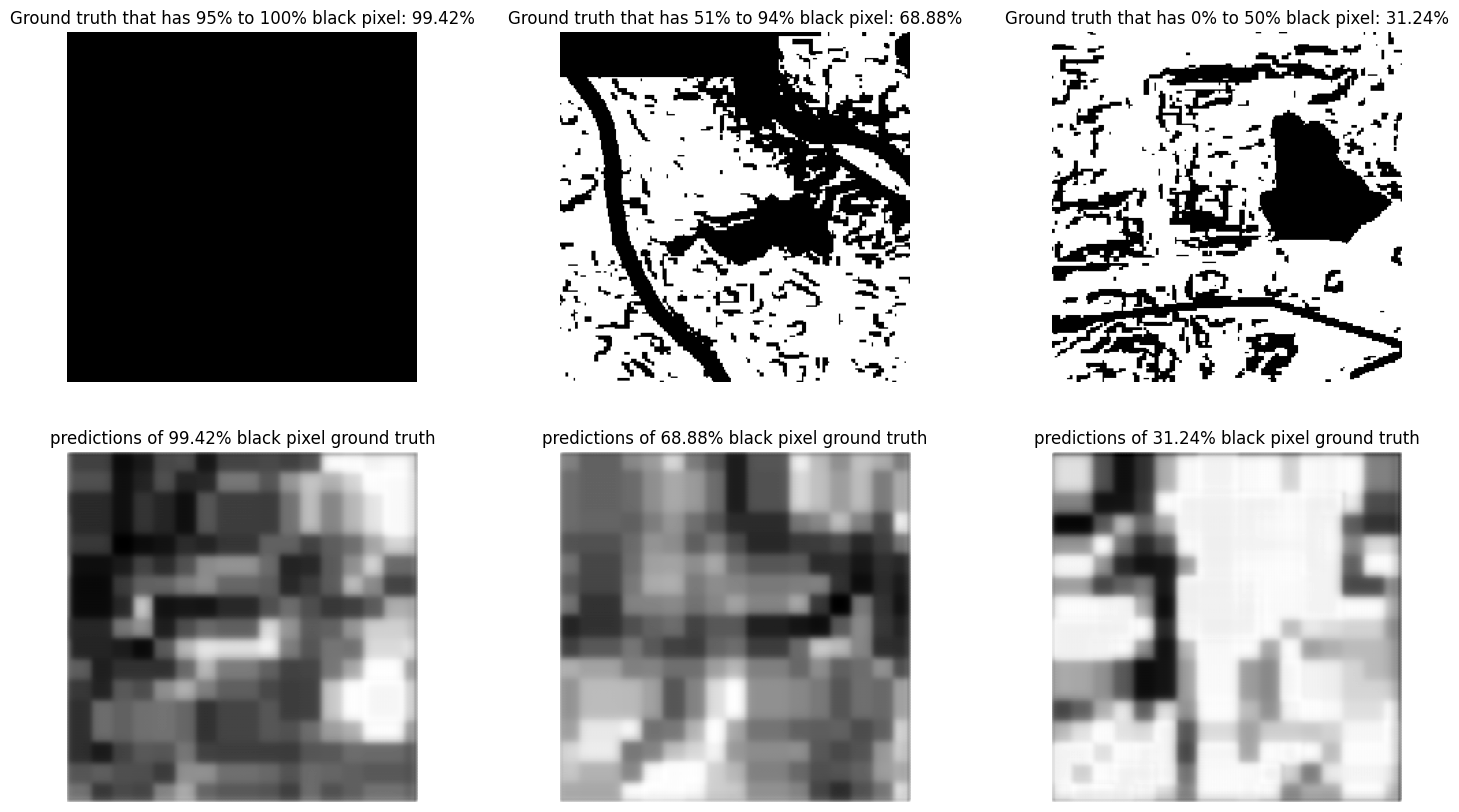

In [46]:
plt.figure(figsize=(18,10))
plt.subplot(2,3,1)
plt.imshow(y_test[1, :, :, 0], cmap='gray')
plt.title('Ground truth that has 95% to 100% black pixel: 99.42%')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(y_test[10, :, :, 0], cmap='gray')
plt.title('Ground truth that has 51% to 94% black pixel: 68.88%')
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(y_test[8, :, :, 0], cmap='gray')
plt.title('Ground truth that has 0% to 50% black pixel: 31.24%')
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(predictions[1, :, :, 0], cmap='gray')
plt.title('predictions of 99.42% black pixel ground truth')
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(predictions[10, :, :, 0], cmap='gray')
plt.title('predictions of 68.88% black pixel ground truth')
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(predictions[8, :, :, 0], cmap='gray')
plt.title('predictions of 31.24% black pixel ground truth')
plt.axis('off')